<center><font size="6">Flight delay analysis</font></center>
<!-- and predictive model -->


<img src="https://images.unsplash.com/photo-1436491865332-7a61a109cc05?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1053&q=80 " alt="drawing" width="600"/>

# Table of Contents

## Inbox:
* Distance and delays
* Archival weather data
* Number of runways - does it influence delays ? Scrape runway
* Gather some data about US airports (reffers to above point aswell)
* Analyse each point starting from the top.

## Working on:

## Done:
1. Converting time features (from string to datetime objects).
* Creating flight time intervals for arrivals plotting.
* Analysing impact of arrivals on departures and vice versa.
    1. Sum of arrive/departure delays for each FTI
    * Difference between consecutive sums of ariive/departuredelays per FTI
    * Rolling mean of sum of arrive/departure delays for each FTI
* Number of flights per FTI impact on delays **Needs analysis**
* Visualizing departure delays for each flight time interval.
* Flights and delays in January (including cancelled) and the most busy day of the week.
	1. January flights
	* The bussiest day of the week
	* How many delays for each interval and day of the week ?
	* How many cancelled flights for each interval and day of the week ?
* The busiest and emptiest airports
	1. USA airports attendance in January 2019
	* Top 10 USA airports with the most flights DEPARTURES
	* Top 10 USA airports with the MOST flights ARRIVES
	* Top 10 USA airports with the LEAST flights DEPARTURES
	* Top 10 USA airports with the LEAST flights ARRIVES
	* The busiest USA airports in January 2019 by ORIGIN?
* Delays by different airlines
    1. Total flights for all Airlines
    * Total delayed flights for all Airlines
    * Total Delayed to Total Flights ratio for each airline
* Arrives/Departures/Total Delayed -> to Total arrives/Total departures/Total flights RATIO **Needs analysis**

## Ideas:
* Later in the predictive modeling we could create future that stands for the level of attendance of a given airport. 
  It could be divided for example into 4 levels -> 4 the busiest and 1 the emptiest.



https://stackoverflow.com/questions/55312548/create-a-heatmap-of-two-categorical-variables

https://aviation.stackexchange.com/questions/68230/can-two-aircraft-be-allowed-to-stay-on-the-same-runway-at-the-same-time

https://catalog.data.gov/dataset/airport-runways
    
" The aircrafts that are landing or taking off have higher priority. The other aircrafts have to wait for these aircrafts before they start or continue taxiing. ... This is why the aircrafts are pushed back from the buildings by a vehicle before they can start their own engines for taxiing. "

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [22]:
# Loading dataset with argument dtype because of time variables 
df = pd.read_csv('Jan_2019_ontime.csv', dtype=str)
df.drop(columns=['Unnamed: 21'], inplace=True)
pd.set_option('max_columns', None)
df_origin = df.copy()

# Exploratory Data Analysis

In [23]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,0601,0.00,0600-0659,0722,0.00,0.00,0.00,300.00
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359,0.00,1400-1459,1633,0.00,0.00,0.00,596.00
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215,0.00,1200-1259,1329,0.00,0.00,0.00,229.00
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521,0.00,1500-1559,1625,0.00,0.00,0.00,223.00
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847,0.00,1900-1959,1940,0.00,0.00,0.00,579.00


In [24]:
df.dtypes

DAY_OF_MONTH             object
DAY_OF_WEEK              object
OP_UNIQUE_CARRIER        object
OP_CARRIER_AIRLINE_ID    object
OP_CARRIER               object
TAIL_NUM                 object
OP_CARRIER_FL_NUM        object
ORIGIN_AIRPORT_ID        object
ORIGIN_AIRPORT_SEQ_ID    object
ORIGIN                   object
DEST_AIRPORT_ID          object
DEST_AIRPORT_SEQ_ID      object
DEST                     object
DEP_TIME                 object
DEP_DEL15                object
DEP_TIME_BLK             object
ARR_TIME                 object
ARR_DEL15                object
CANCELLED                object
DIVERTED                 object
DISTANCE                 object
dtype: object

In [58]:
# Numeric columns
num_columns = ['DAY_OF_MONTH','DAY_OF_WEEK','DEP_DEL15', 'ARR_DEL15', 'CANCELLED', 'DIVERTED','DISTANCE']
for nc in num_columns:
    df[nc] = pd.to_numeric(df[nc])

In [26]:
df.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID     object
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM         object
ORIGIN_AIRPORT_ID         object
ORIGIN_AIRPORT_SEQ_ID     object
ORIGIN                    object
DEST_AIRPORT_ID           object
DEST_AIRPORT_SEQ_ID       object
DEST                      object
DEP_TIME                  object
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                  object
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
dtype: object

## 1.Converting time features

In [27]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,0601,0.0,0600-0659,0722,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359,0.0,1400-1459,1633,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215,0.0,1200-1259,1329,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521,0.0,1500-1559,1625,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847,0.0,1900-1959,1940,0.0,0.0,0.0,579.0


In [28]:
from datetime import datetime
df['DEP_BLK_LOWER'] = df.DEP_TIME_BLK.apply(lambda x: datetime.strptime(x.split('-')[0], '%H%M').time())
df['DEP_BLK_UPPER'] = df.DEP_TIME_BLK.apply(lambda x: datetime.strptime(x.split('-')[1], '%H%M').time())


In [29]:
def convert_time(t):
    if pd.isna(t):
        return np.NaN
    else:
        if t == '2400':
            t = '0000'
        return datetime.strptime(t, '%H%M').time()

df['DEP_TIME'] = df['DEP_TIME'].apply(convert_time)
df['ARR_TIME'] = df['ARR_TIME'].apply(convert_time)

In [30]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DEP_BLK_LOWER,DEP_BLK_UPPER
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,06:01:00,0.0,0600-0659,07:22:00,0.0,0.0,0.0,300.0,06:00:00,06:59:00
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,13:59:00,0.0,1400-1459,16:33:00,0.0,0.0,0.0,596.0,14:00:00,14:59:00
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,12:15:00,0.0,1200-1259,13:29:00,0.0,0.0,0.0,229.0,12:00:00,12:59:00
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,15:21:00,0.0,1500-1559,16:25:00,0.0,0.0,0.0,223.0,15:00:00,15:59:00
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,18:47:00,0.0,1900-1959,19:40:00,0.0,0.0,0.0,579.0,19:00:00,19:59:00


In [31]:
df[df['CANCELLED']==1]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DEP_BLK_LOWER,DEP_BLK_UPPER
397,1,2,AA,19805,AA,N965NN,178,14027,1402702,PBI,13930,1393007,ORD,NaN,NaN,0600-0659,NaN,NaN,1.0,0.0,1143.0,06:00:00,06:59:00
403,1,2,AA,19805,AA,N9015D,189,11503,1150305,EGE,11298,1129806,DFW,NaN,NaN,0700-0759,NaN,NaN,1.0,0.0,721.0,07:00:00,07:59:00
971,1,2,OH,20397,OH,N572NN,5103,11057,1105703,CLT,14193,1419306,PNS,19:53:00,0.0,1900-1959,NaN,NaN,1.0,0.0,488.0,19:00:00,19:59:00
1973,1,2,EV,20366,EV,N17984,4187,12448,1244807,JAN,12266,1226603,IAH,NaN,NaN,0900-0959,NaN,NaN,1.0,0.0,351.0,09:00:00,09:59:00
1975,1,2,EV,20366,EV,N17984,4189,12266,1226603,IAH,12448,1244807,JAN,NaN,NaN,0700-0759,NaN,NaN,1.0,0.0,351.0,07:00:00,07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583958,31,4,UA,19977,UA,NaN,220,14122,1412202,PIT,13930,1393007,ORD,NaN,NaN,1700-1759,NaN,NaN,1.0,0.0,413.0,17:00:00,17:59:00
583959,31,4,UA,19977,UA,NaN,219,10792,1079206,BUF,13930,1393007,ORD,NaN,NaN,0800-0859,NaN,NaN,1.0,0.0,473.0,08:00:00,08:59:00
583964,31,4,UA,19977,UA,NaN,215,11042,1104205,CLE,13930,1393007,ORD,NaN,NaN,1600-1659,NaN,NaN,1.0,0.0,315.0,16:00:00,16:59:00
583966,31,4,UA,19977,UA,NaN,213,10849,1084905,BZN,13930,1393007,ORD,NaN,NaN,0900-0959,NaN,NaN,1.0,0.0,1186.0,09:00:00,09:59:00


Flights with NaN arrive and departure time are related to cancelled flights.

## 2.Creating flight time intervals for arrivals plotting

FTI - Flight Time intervals:
- 00:01 => 05:59
- 06:00 => 06:59, ..., 23:00 => 23:59

In [34]:
from datetime import time
def getFTI(arr_time):
    if arr_time > time(5,59) and arr_time <= time(23,59):
        return (time(arr_time.hour,0), time(arr_time.hour,59))
    else:
        return (time(0,1), time(5,59))
# getFTI(df['ARR_TIME'][3])

ARR_BLK = df['ARR_TIME'].apply(lambda x: (np.NaN, np.NaN) if pd.isna(x) else getFTI(x))

df['ARR_BLK_LOWER'] = [l[0] for l in ARR_BLK] 
df['ARR_BLK_UPPER'] = [u[1] for u in ARR_BLK]


Created flight time intervals for arrive time are used for analysing departure intervals, so we know in which departure FTI given plane has landed. The reason of this is that arriving airplanes have the priority to land before waiting airplanes wil depart.

>" The aircrafts that are landing or taking off have higher priority. The other aircrafts have to wait for these aircrafts before they start or continue taxiing. ... This is why the aircrafts are pushed back from the buildings by a vehicle before they can start their own engines for taxiing. "

#### [Source - Phases Of A Flight by www.fp7-restarts.eu ](https://www.fp7-restarts.eu/index.php/home/root/state-of-the-art/objectives/2012-02-15-11-58-37/71-book-video/parti-principles-of-flight/126-4-phases-of-a-flight.html)

## 3. Analysing impact of arrivals on departures and vice versa.

In [35]:
def arrival_on_depart_impact(airport, day):
    fig_size = (15,5)
    
    aod_origin = df.loc[(df.ORIGIN==airport) & (df.DAY_OF_MONTH==day)].sort_values(by=['DEP_BLK_LOWER', 'DEP_TIME']).dropna()
    aod_dest = df.loc[(df.DEST==airport) & (df.DAY_OF_MONTH==day)].sort_values(by=['ARR_BLK_LOWER', 'ARR_TIME']).dropna()

    dep_FTI_delay = aod_origin.groupby(by=['DEP_BLK_LOWER'])['DEP_DEL15']
    arr_FTI_delay = aod_dest.groupby(by=['ARR_BLK_LOWER'])['ARR_DEL15']


    # ---------------------- Sum of ariive/departure delays for each FTI ----------------------  
    f_sum, ax_sum = plt.subplots(figsize=fig_size)
    grouped_sum_dep = (dep_FTI_delay
                       .sum().reset_index().fillna(0))
    grouped_sum_arr = (arr_FTI_delay
                       .sum().reset_index().fillna(0))
    
    sns.lineplot(
        x=grouped_sum_arr['ARR_BLK_LOWER'].apply(lambda x: x.hour),
        y=grouped_sum_arr['ARR_DEL15'].values,
        ax=ax_sum
    )
    sns.lineplot(
        x=grouped_sum_dep['DEP_BLK_LOWER'].apply(lambda x: x.hour),
        y=grouped_sum_dep['DEP_DEL15'],
        ax=ax_sum
    )
    ax_sum.legend(['Arrive','Departure'])

    plt.title('Sum of ariive/departure delays for each FTI')
    
        
    # ---------------------- Difference between consecutive sums of ariive/departuredelays per FTI ----------------------     
    
    # Rolling difference between two consecutive variables for sum of departure delays
    dep_roll_diff = (dep_FTI_delay
                .sum().rolling(window=2).apply(lambda x: x.iloc[1]-x.iloc[0]).fillna(0))
    # Rolling difference between two consecutive variables for sum of arrive delays
    arr_roll_diff = (arr_FTI_delay
                .sum().rolling(window=2).apply(lambda x: x.iloc[1]-x.iloc[0]).fillna(0))

    # Concatenating two df's previeously created into one     
    rolling_diff = pd.concat([arr_roll_diff,dep_roll_diff],axis=1).reset_index()
    
    # Melting dillay difference into one column and creating additional standing for category(arrive, departure) 
    melted_rolling_diff = rolling_diff.melt(id_vars=['index'], value_vars=['ARR_DEL15','DEP_DEL15'])
    melted_rolling_diff['variable'] = melted_rolling_diff['variable'].apply(
                lambda x: 'Arrive' if x=='ARR_DEL15' else "Departure")
    
    # Plotting    
    fig, ax1 = plt.subplots(figsize=fig_size)
    chart = sns.barplot(x='index',y='value',hue='variable',data=melted_rolling_diff, ax=ax1)
    sns.despine(fig)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title('Difference between consecutive sums of delays per FTI')
    
    
    
    # ---------------------- Rolling mean of sum of ariive/departure delays for each FTI ----------------------  
    f_roll_mean, ax_roll_mean = plt.subplots(figsize=fig_size,)
    roll_mean_dep = (dep_FTI_delay
                    .sum().rolling(4, win_type='triang').mean()
                    .reset_index().fillna(0))
    roll_mean_arr = (arr_FTI_delay
                    .sum().rolling(4, win_type='triang').mean()
                    .reset_index().fillna(0))
    
    sns.lineplot(
        x=roll_mean_arr['ARR_BLK_LOWER'].apply(lambda x: x.hour),
        y=roll_mean_arr['ARR_DEL15'].values,
        ax=ax_roll_mean
    )
    
    sns.lineplot(
        x=roll_mean_dep['DEP_BLK_LOWER'].apply(lambda x: x.hour),
        y=roll_mean_dep['DEP_DEL15'],
        ax=ax_roll_mean
    )
    ax_roll_mean.legend(['Arrive','Departure'])
    



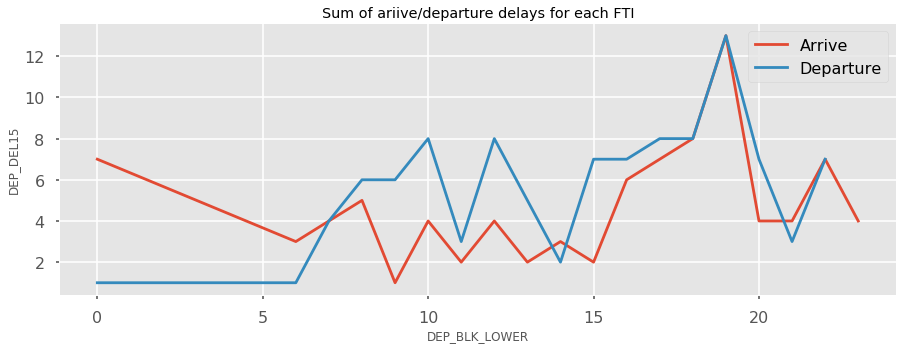

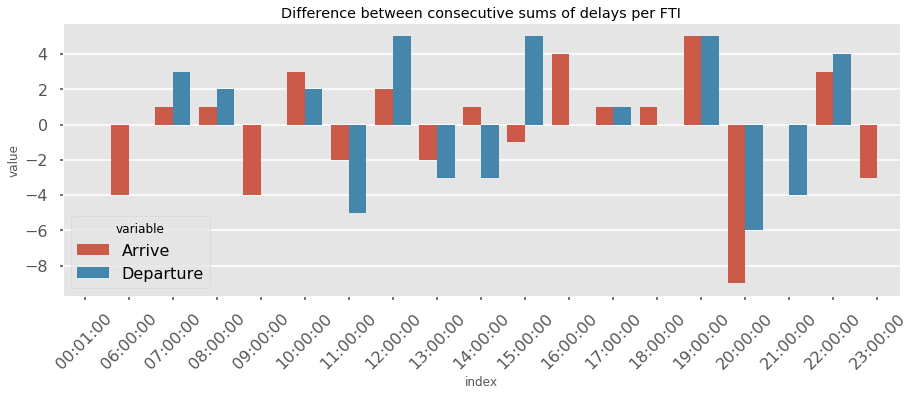

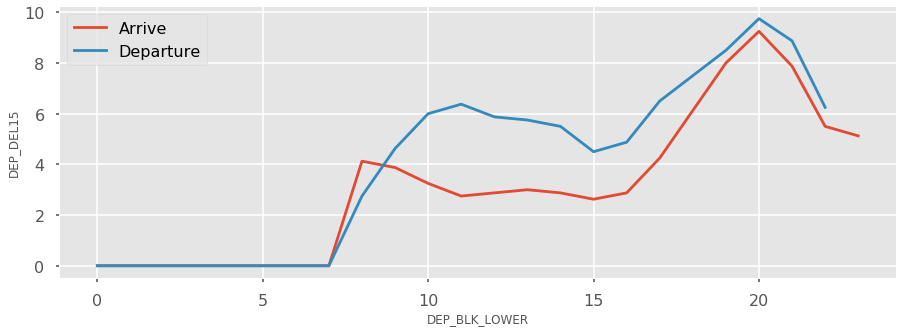

In [36]:
arrival_on_depart_impact('ORD', 5)


## 4.Number of flights per FTI impact on delays 

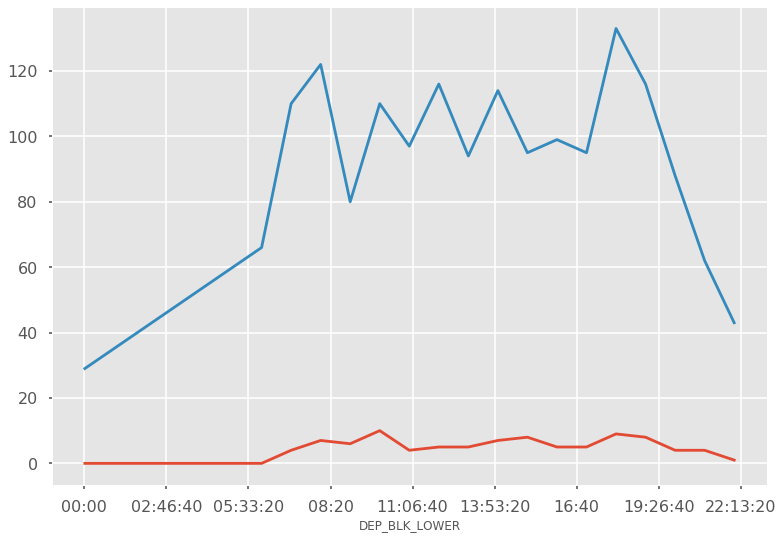

In [37]:

airport = "ORD"
day = 9

aod_origin = df.loc[(df.ORIGIN==airport) & (df.DAY_OF_MONTH==day)].sort_values(by=['DEP_BLK_LOWER', 'DEP_TIME']).dropna()
aod_dest = df.loc[(df.DEST==airport) & (df.DAY_OF_MONTH==day)].sort_values(by=['ARR_BLK_LOWER', 'ARR_TIME']).dropna()

# aod_origin.groupby(by=['DEP_BLK_LOWER'])['DEP_DEL15'].count().plot()
aod_origin.groupby(by=['DEP_BLK_LOWER'])['DEP_DEL15'].sum().plot()

(aod_dest.groupby(by=['ARR_BLK_LOWER'])['ARR_DEL15'].count()+
 aod_origin.groupby(by=['DEP_BLK_LOWER'])['DEP_DEL15'].count()).plot()
# aod_dest.groupby(by=['ARR_BLK_LOWER'])['ARR_DEL15'].sum().plot()

# aod_origin.groupby(by=['ARR_BLK_LOWER'])['ARR_TIME'].count().plot()



## 5. Visualizing departure delays for each flight time interval.

**By this chart we can absolutely confirm the impact of arriving airplanes on these waiting for departure.**

In [38]:
def plot_departure_delays(airport, day, showDeparture=True):
    ord1 = df.loc[(df.ORIGIN==airport) & (df.DAY_OF_MONTH==day)].sort_values(by=['DEP_BLK_LOWER', 'DEP_TIME']).dropna()

    ord1.reset_index(drop=True, inplace=True)
    ord1['DEP_TIME_min'] = ord1.DEP_TIME.apply(lambda x: (x.hour*60)+x.minute)
    ord1['DEP_BLK_LOWER_hour'] = ord1.DEP_BLK_LOWER.apply(lambda x: x.hour)

    # Running sum for each block of time 
    ord1['DEL_BLOCK_RUN_SUM'] = ord1.groupby(by=['DEP_BLK_LOWER_hour'])['DEP_DEL15'].cumsum()
    # list(ord1.index)

    plt.figure(figsize=(15,9))
    sns.lineplot(x=list(ord1.index), y='DEP_TIME_min', data=ord1, size=1)
    sns.scatterplot(x=list(ord1.index), y='DEP_TIME_min',
                    hue = 'DEL_BLOCK_RUN_SUM',
                    size = 'DEL_BLOCK_RUN_SUM' ,
                    data=ord1,
                    palette='PuBu')

def plot_arrive_delays(airport, day):
    ord1 = df.loc[(df.DEST==airport) & (df.DAY_OF_MONTH==day)].sort_values(by=['DEP_BLK_LOWER','ARR_TIME']).dropna()

    ord1.reset_index(drop=True, inplace=True)
    ord1['ARR_TIME_min'] = ord1.ARR_TIME.apply(lambda x: (x.hour*60)+x.minute)
    ord1['DEP_BLK_LOWER_hour'] = ord1.DEP_BLK_LOWER.apply(lambda x: x.hour)

    # Running sum for each block of time 
    ord1['DEL_BLOCK_RUN_SUM'] = ord1.groupby(by=['DEP_BLK_LOWER_hour'])['ARR_DEL15'].cumsum()
    # list(ord1.index)

    plt.figure(figsize=(15,9))
    sns.lineplot(x=list(ord1.index), y='ARR_TIME_min', data=ord1, size=1)
    sns.scatterplot(x=list(ord1.index), y='ARR_TIME_min',
                    hue = 'DEL_BLOCK_RUN_SUM',
                    size = 'DEL_BLOCK_RUN_SUM' ,
                    data=ord1,
                    palette='PuBu')

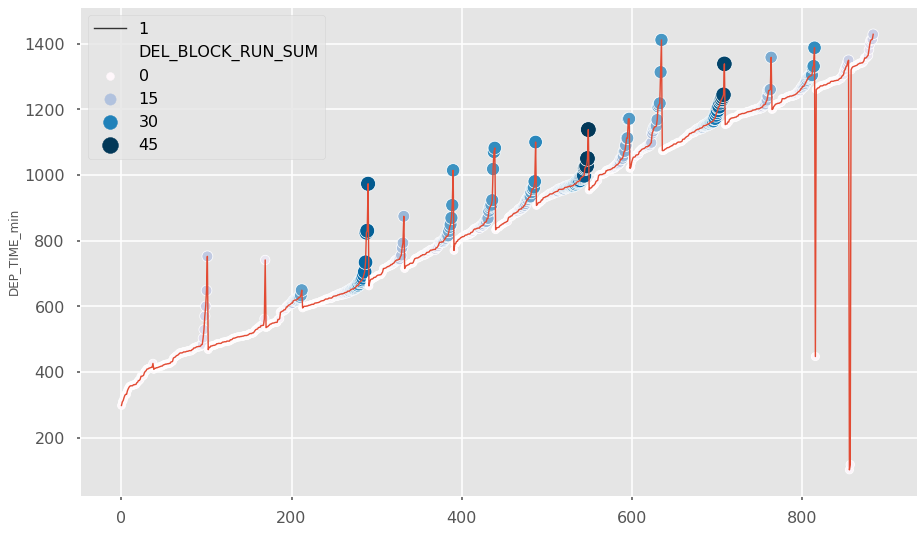

In [39]:
# df[df['DEP_TIME'].isna()]
# departure from ORD, 1.01.2019 and sorted 
plot_departure_delays('ORD', 2, showDeparture=False)
# plot_arrive_delays('ORD', 2)


# sns.scatterplot(x='DEP_TIME_min', y='DEP_BLK_LOWER_hour', hue = 'DEP_DEL15', data=ord1)

Cancelled flights are not included in this sub-dataframe.

Analysing flight time intervals we can notice, that after some delays in a block of time there are atlest 5 move further delays.

Spikes at the end of the above plot are associated with flight transfer to the upcoming day, so they are in the morning.

todo: **running sum of delays for each time interval**

### How does delays per flight time interval change over time ?

In [40]:
#calculating max number of delays for each flight time interval 
plt.figure()
ord1.groupby(by=['DEP_BLK_LOWER_hour'])['DEL_BLOCK_RUN_SUM'].max().rename('TIME_INTERVAL_MAX').plot(legend=True)
ord1.groupby(by=['DEP_BLK_LOWER_hour'])['DEL_BLOCK_RUN_SUM'].max().rolling(4, win_type='triang').mean().rename('TIME_INTERVAL_MEAN_MAX').plot(legend=True)
plt.title('How does delays per flight time interval change over time ?')

NameError: name 'ord1' is not defined

<Figure size 921.6x633.6 with 0 Axes>

<font size="3">
    Blue line on the above plot shows the rolling mean of total delays per flight time interval. From this line we can infer that delay is increasing over the next intervals.
</font>

## 5. Flights in January (including cancelled) and the most busy day of the week.

### A. January flights

Text(0.5, 1, 'How many delays for each interval and day of the week ?')

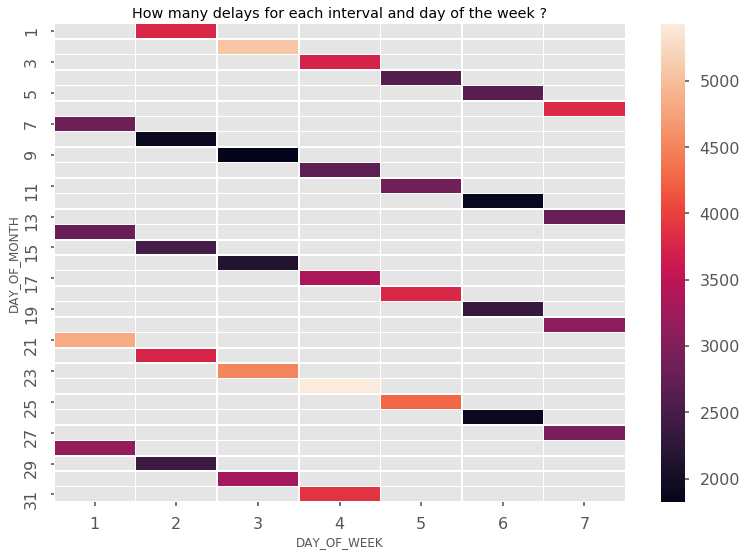

In [57]:
# Visualizing total flights in January (including cancelled) 
test = pd.crosstab(index = df.DAY_OF_MONTH , 
                   columns = df.DAY_OF_WEEK,
                  values = df.DEP_DEL15,
                  aggfunc=np.sum)

sns.heatmap(test, linewidths=.5)
plt.title('How many delays for each interval and day of the week ?')


<font size="3">
    If we compare two heatmaps from which first one (above) shows flights for each day of the month, and the second one (below) showing each day of the week with flight time intervals we can notice that thursdey is the busiest day of the week.
</font>

### B. The bussiest day of the week

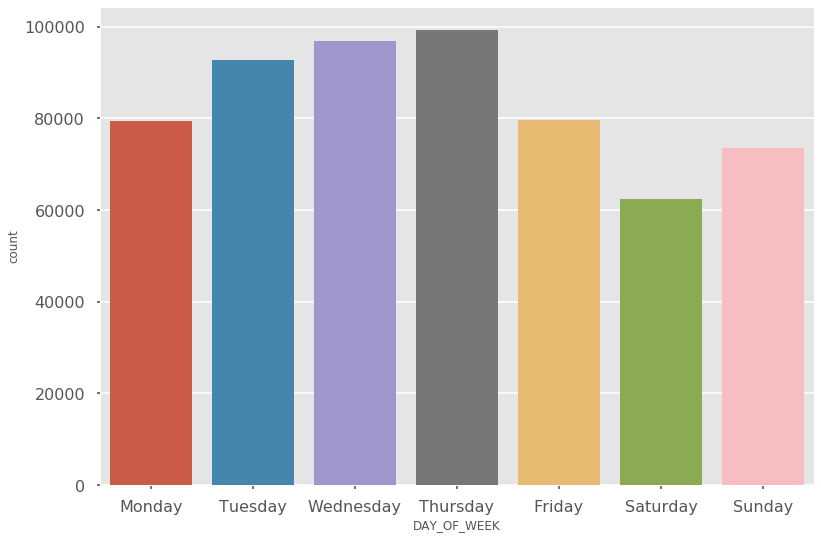

In [42]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(df['DAY_OF_WEEK'].apply(lambda x: weekDays[x-1]), order=weekDays)

### C. How many delays for each interval and day of the week ?

Text(0.5, 1, 'How many delays for each interval and day of the week ?')

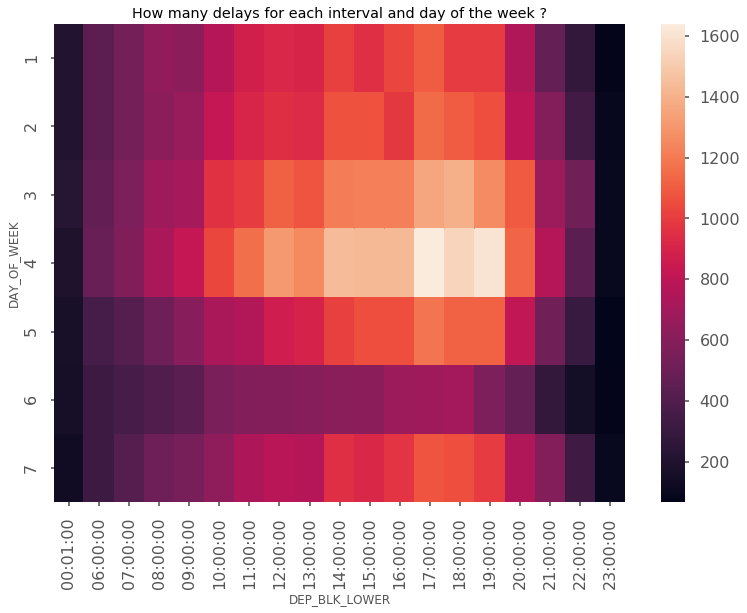

In [43]:
test = pd.crosstab(index = df.DAY_OF_WEEK , 
                   columns = df.DEP_BLK_LOWER,
                  values = df.DEP_DEL15,
                  aggfunc=np.sum)
sns.heatmap(test)
plt.title('How many delays for each interval and day of the week ?')


### D. How many cancelled flights for each interval and day of the week ?

Text(0.5, 1, 'How many cancelled flights for each interval and day of the week ?')

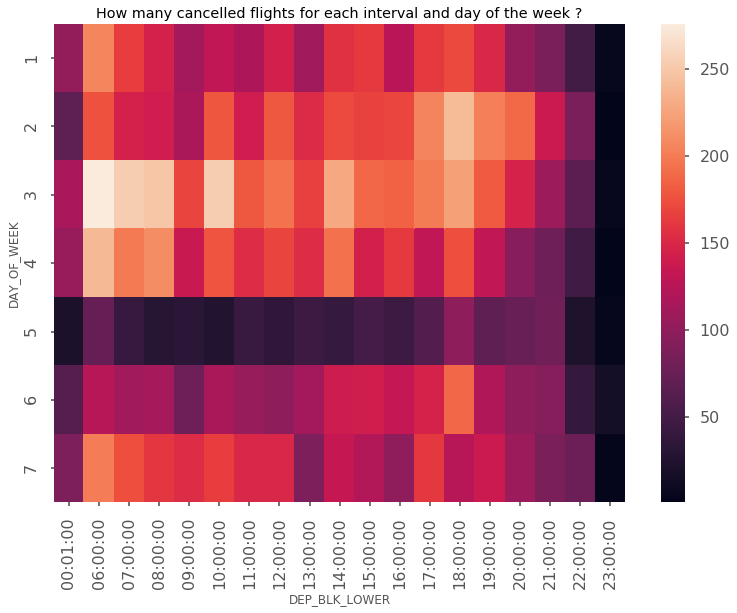

In [44]:
test = pd.crosstab(index = df.DAY_OF_WEEK , 
                   columns = df.DEP_BLK_LOWER,
                  values = df.CANCELLED,
                  aggfunc=np.sum)
sns.heatmap(test)
plt.title('How many cancelled flights for each interval and day of the week ?')

## 7. The busiest and emptiest airports.

### A. USA airports attendance in January 2019

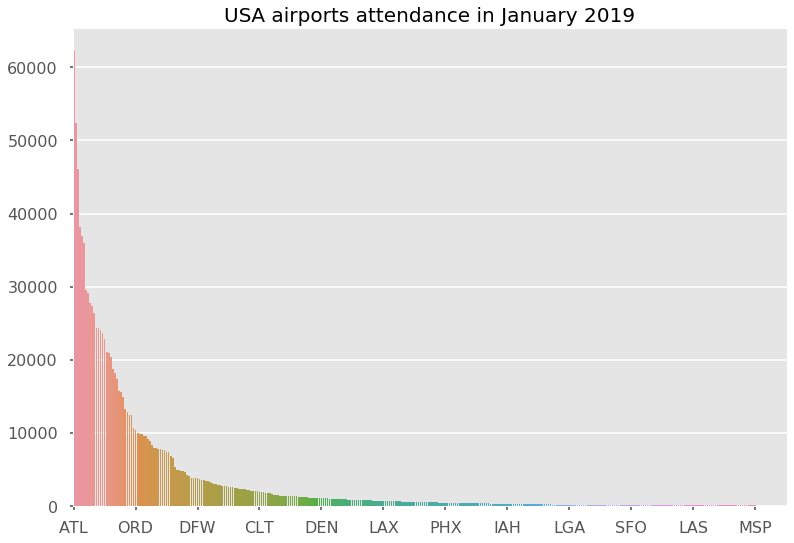

In [45]:
# from collections import Counter
ORIGIN_counts = df['ORIGIN'].value_counts()
DEST_counts = df['DEST'].value_counts()
TOTAL_counts = (ORIGIN_counts + DEST_counts).sort_values(ascending=False)

sns.barplot(x=TOTAL_counts.keys(),y=TOTAL_counts.values)
plt.title('USA airports attendance in January 2019', fontsize=20)
plt.xticks(np.arange(0,len(TOTAL_counts), step=30));

**IDEA** Later in the predictive modeling we could create future that stands for the level of attendance of a given airport. 

It could be divided for example into 4 levels -> 4 the busiest and 1 the emptiest.
 

### B. Top 10 USA airports with the most flights DEPARTURES

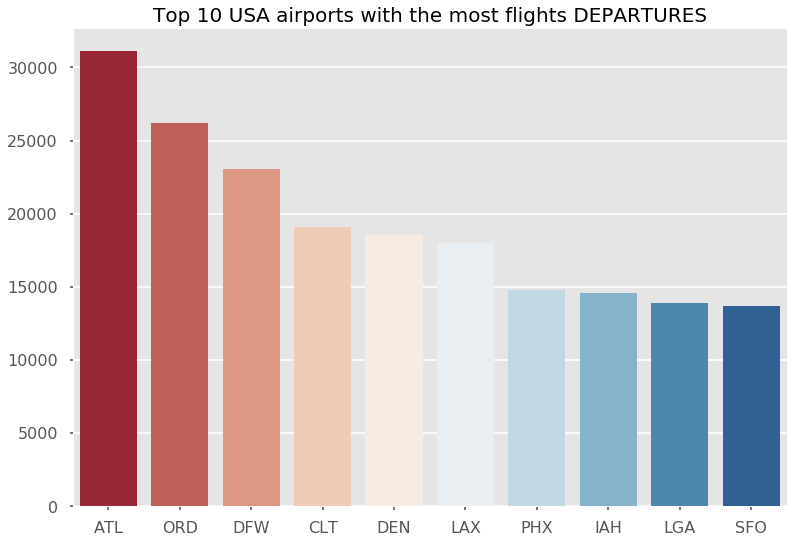

In [46]:
sns.barplot(x=ORIGIN_counts.keys()[:10],y=ORIGIN_counts.values[:10],palette='RdBu')
plt.title('Top 10 USA airports with the most flights DEPARTURES', fontsize=20);


### C. Top 10 USA airports with the MOST flights ARRIVES

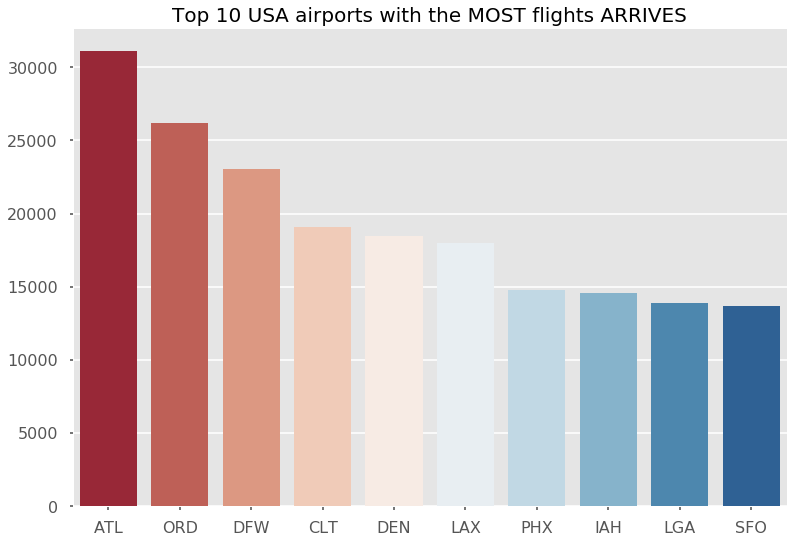

In [47]:
sns.barplot(x=DEST_counts.keys()[:10],y=DEST_counts.values[:10],palette='RdBu')
plt.title('Top 10 USA airports with the MOST flights ARRIVES', fontsize=20);


### D. Top 10 USA airports with the LEAST flights DEPARTURES.

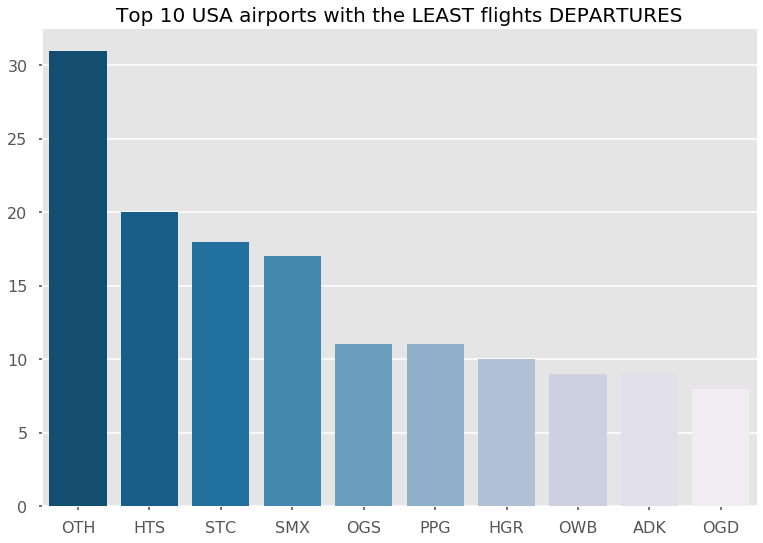

In [48]:
sns.barplot(x=ORIGIN_counts.keys()[-10:],
            y=ORIGIN_counts.values[-10:],
            palette=reversed(sns.color_palette('PuBu', n_colors=10)))

plt.title('Top 10 USA airports with the LEAST flights DEPARTURES', fontsize=20);


### E. Top 10 USA airports with the LEAST flights ARRIVES.

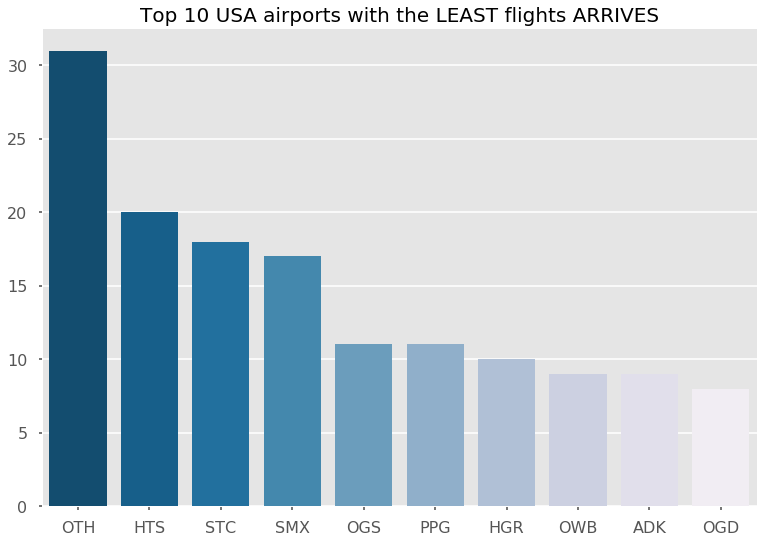

In [49]:
sns.barplot(x=DEST_counts.keys()[-10:],
            y=DEST_counts.values[-10:],
            palette=reversed(sns.color_palette('PuBu', n_colors=10)))

plt.title('Top 10 USA airports with the LEAST flights ARRIVES', fontsize=20);


### F. The busiest USA airports in January 2019 by ORIGIN

<font size="4"> The number of flights departures and arrives are similiar for most of the airports.</font> 

Text(0.5, 1.0, 'The busiest USA airports in January 2019 by ORIGIN')

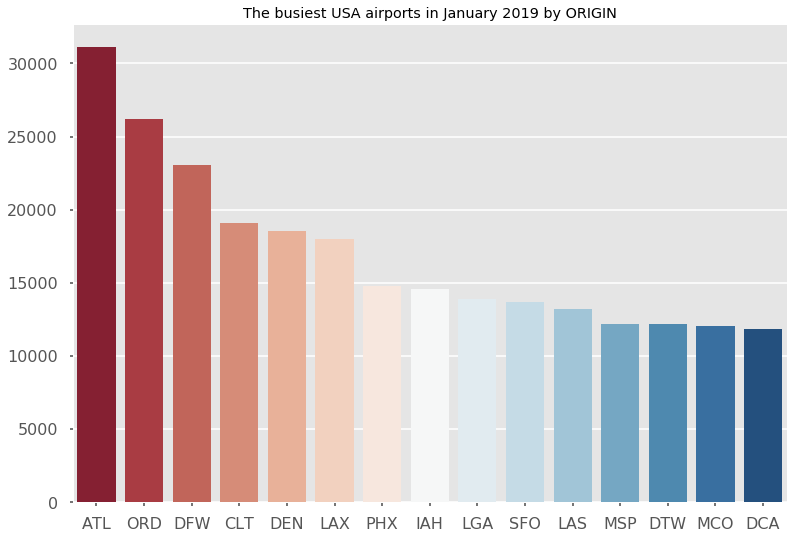

In [50]:
sns.barplot(x=ORIGIN_counts.keys()[:15],y=ORIGIN_counts.values[:15],palette='RdBu')
plt.title('The busiest USA airports in January 2019 by ORIGIN')

## 8. Delays by different airlines

In [51]:
airlinesTotalFlights = df.OP_UNIQUE_CARRIER.value_counts().to_frame()
airlinesDepDelays = df.groupby(by=['OP_UNIQUE_CARRIER'])['DEP_DEL15'].sum().to_frame()
airlinesArrDelays = df.groupby(by=['OP_UNIQUE_CARRIER'])['ARR_DEL15'].sum().to_frame()

airlines = pd.concat([airlinesTotalFlights, airlinesDepDelays, airlinesArrDelays], axis=1)
airlines.rename(columns={"OP_UNIQUE_CARRIER": "TOTAL_FLIGHTS",
                   "DEP_DEL15": "TOTAL_DEP_DEL",
                   "ARR_DEL15": "TOTAL_ARR_DEL"}, 
                    inplace = True)

# airlines.apply(lambda x: x.TOTAL_DEP_DEL/x.TOTAL_FLIGHTS)
airlines['DEP_DEL_TOTAL_RATIO']=airlines.TOTAL_DEP_DEL / airlines.TOTAL_FLIGHTS
airlines['ARR_DEL_TOTAL_RATIO']=airlines.TOTAL_ARR_DEL / airlines.TOTAL_FLIGHTS
airlines['TOTAL_DEL']=airlines.TOTAL_ARR_DEL+airlines.TOTAL_DEP_DEL
airlines['DEL_TOTAL_RATIO']= airlines.TOTAL_DEL / airlines.TOTAL_FLIGHTS



In [52]:
airlines.head()

,TOTAL_FLIGHTS,TOTAL_DEP_DEL,TOTAL_ARR_DEL,DEP_DEL_TOTAL_RATIO,ARR_DEL_TOTAL_RATIO,TOTAL_DEL,DEL_TOTAL_RATIO
WN,111312,18507.0,16111.0,0.166262,0.144737,34618.0,0.311000
AA,77017,12077.0,13741.0,0.156810,0.178415,25818.0,0.335225
DL,73836,9462.0,9403.0,0.128149,0.127350,18865.0,0.255499
OO,64926,12714.0,14024.0,0.195823,0.216000,26738.0,0.411823
UA,46915,8401.0,9156.0,0.179069,0.195161,17557.0,0.374230


### A. Total flights for all Airlines

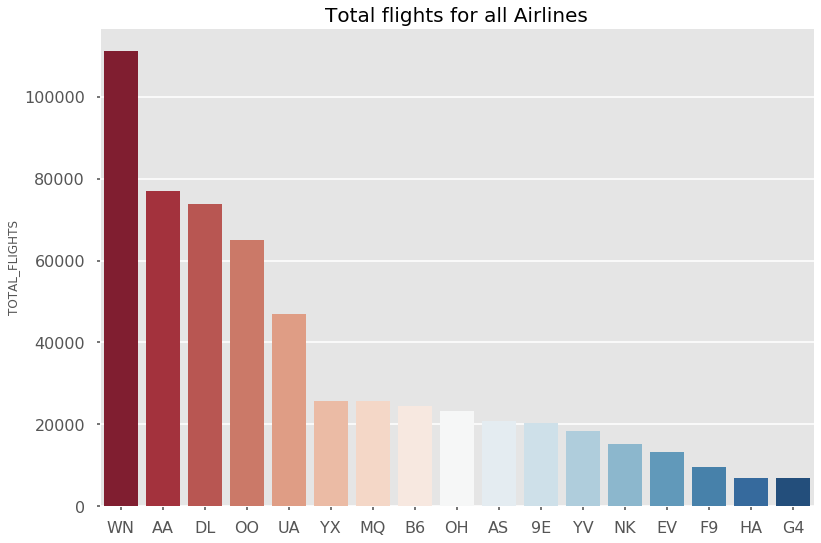

In [53]:
sns.barplot(x=airlines.index,
            y='TOTAL_FLIGHTS',
            data=airlines,palette='RdBu',
            order=airlines.sort_values(by=['TOTAL_FLIGHTS'], ascending=False).index)
plt.title('Total flights for all Airlines', fontsize=20);


### Top four airlines which had the most America flights in January 2019:
* WN - Southwest Airlines
* AA - American Airlines
* DL - Delta Air Lines
* OO - SkyWest Airlines

### Top three airlines which had the least America flights in January 2019:
* HA - Hawaiian Airlines
* G4 - Allegiant Air
* NK - Spirit Airlines

### B. Total delayed flights for all Airlines

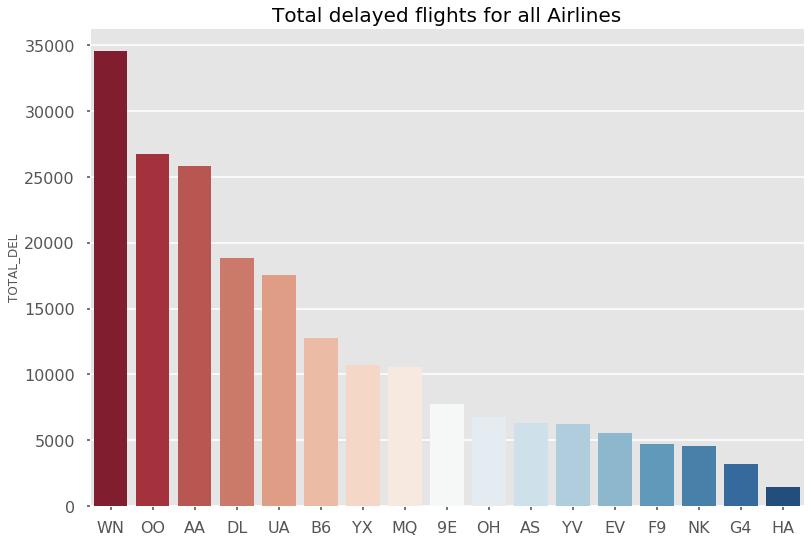

In [54]:
sns.barplot(x=airlines.index,
            y='TOTAL_DEL',
            data=airlines,palette='RdBu',
            order=airlines.sort_values(by=['TOTAL_DEL'], ascending=False).index)
plt.title('Total delayed flights for all Airlines', fontsize=20);


### C. Total Delayed to Total Flights ratio for each airline.

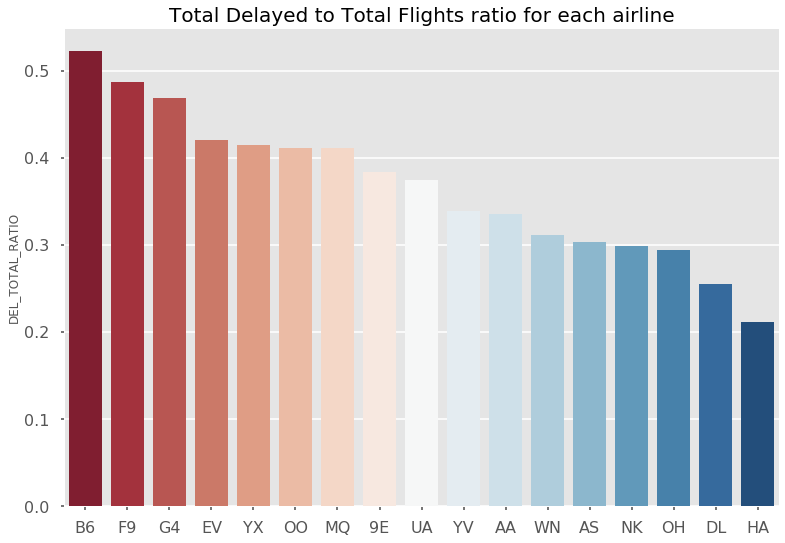

In [55]:
sns.barplot(x=airlines.index,
            y='DEL_TOTAL_RATIO',
            data=airlines,palette='RdBu',
            order=airlines.sort_values(by=['DEL_TOTAL_RATIO'], ascending=False).index);
plt.title('Total Delayed to Total Flights ratio for each airline', fontsize=20);


## 9. Arrives/Departures/Total Delayed -> to Total arrives/Total departures/Total flights RATIO

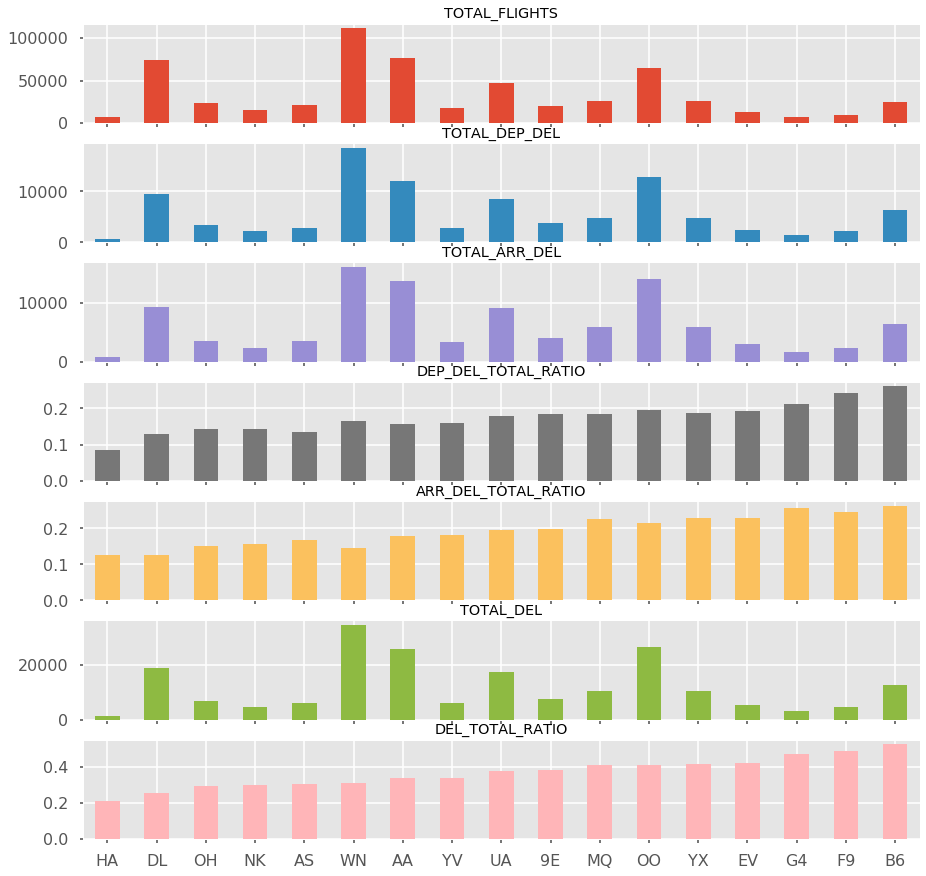

In [56]:
ratioColumns = ['ARR_DEL_TOTAL_RATIO','DEP_DEL_TOTAL_RATIO']
# airlines[ratioColumns].plot.bar(rot=0)

airlines.sort_values(by=['DEL_TOTAL_RATIO'], inplace= True)
axes = airlines.plot.bar(rot=0, subplots=True,figsize=(15,15))
for a in axes:
    a.legend().remove()
# sns.boxplot(x='DEP_DEL_TOTAL_RATIO', y='AIRLINE')

# Distance and delays 

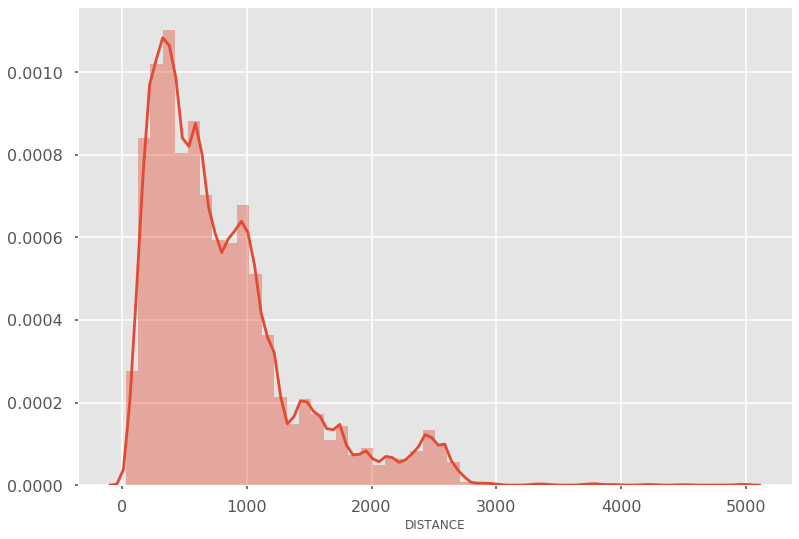

In [185]:
sns.distplot(df.DISTANCE)
# sns.scatterplot(x='ARR_DEL15',y='DISTANCE', data=df)

# sns.